I am aiming to use ASIC-provided data on Australian Financial Service Licensees (AFSLs) as well as data on Authorised Representatives (ARs) of these AFSLs, and data on Financial Advisers (FAs) specially to look at trends among AFSLs and advisers. Data provided is from data.gov.au and is updated monthly by ASIC.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
FA2020Apr = pd.read_csv("/home/jack/AFS/FA2020Apr.csv", encoding= 'unicode_escape', 
                        dtype = {"LICENCE_ABN" : "str"})

In [4]:

FA2020Apr.head() # Checking to see if csv has imported properly

,ADV_NAME,ADV_NUMBER,ADV_ROLE_STATUS,ADV_FIRST_PROVIDED_ADVICE,LICENCE_NAME,LICENCE_NUMBER,LICENCE_ABN,LICENCE_CONTROLLED_BY,ADV_START_DT,ADV_END_DT
0,JOHN PETER CORNIPS,221137,Ceased,1987.0,BJT FINANCIAL PLANNING PTY. LTD.,219548,25005620824,NaN,04/06/02,05/04/17
1,MATTHEW DOUGLAS ROWE,221893,Ceased,1998.0,HOOD SWEENEY SECURITIES PTY LTD,220897,40081455165,NaN,10/07/02,01/01/16
2,JULIAN ANDREW SUMMERS,221931,Ceased,2002.0,CHARTER FINANCIAL PLANNING LIMITED,234665,35002976294,AMP ADVICE HOLDINGS PTY LTD ~ AMP LIMITED [Dat...,07/08/06,31/01/19
3,CHERYL STORRS,221932,Ceased,1997.0,FINANCIAL WISDOM LIMITED,231138,70006646108,COMMONWEALTH BANK OF AUSTRALIA,26/04/05,17/06/19
4,BERNARD MARTIN,222020,Current,1970.0,RESPECT FINANCIAL SERVICES PTY LTD,508000,80624859758,David Paul THURBON,26/02/19,NaN


In [5]:
FA2020Apr.dtypes # Some of these are fine. Dates are objects, though.

ADV_NAME                      object
ADV_NUMBER                     int64
ADV_ROLE_STATUS               object
ADV_FIRST_PROVIDED_ADVICE    float64
LICENCE_NAME                  object
LICENCE_NUMBER                 int64
LICENCE_ABN                   object
LICENCE_CONTROLLED_BY         object
ADV_START_DT                  object
ADV_END_DT                    object
dtype: object

In [6]:
#Renaming columns for readability
FA2020Apr.rename(columns={'ADV_NAME' : 'Name', 'ADV_NUMBER' : 'Adviser Number', 'ADV_ROLE_STATUS' : 'Current/Ceased',
                          'ADV_FIRST_PROVIDED_ADVICE' : 'First Provided Advice', 'LICENCE_NAME' : 'Licensee',
                          'LICENCE_NUMBER' : 'AFS License Number', 'LICENCE_ABN' : 'AFSL ABN',
                          'LICENCE_CONTROLLED_BY' : 'Licensee Controller', 'ADV_START_DT' : 'Start Date',
                          'ADV_END_DT' : 'End Date',
                          'ADV_END_DT' : 'End Date', }, inplace=True)



In [7]:
FA2020Apr.head() # Checking to see if all looks ok

,Name,Adviser Number,Current/Ceased,First Provided Advice,Licensee,AFS License Number,AFSL ABN,Licensee Controller,Start Date,End Date
0,JOHN PETER CORNIPS,221137,Ceased,1987.0,BJT FINANCIAL PLANNING PTY. LTD.,219548,25005620824,NaN,04/06/02,05/04/17
1,MATTHEW DOUGLAS ROWE,221893,Ceased,1998.0,HOOD SWEENEY SECURITIES PTY LTD,220897,40081455165,NaN,10/07/02,01/01/16
2,JULIAN ANDREW SUMMERS,221931,Ceased,2002.0,CHARTER FINANCIAL PLANNING LIMITED,234665,35002976294,AMP ADVICE HOLDINGS PTY LTD ~ AMP LIMITED [Dat...,07/08/06,31/01/19
3,CHERYL STORRS,221932,Ceased,1997.0,FINANCIAL WISDOM LIMITED,231138,70006646108,COMMONWEALTH BANK OF AUSTRALIA,26/04/05,17/06/19
4,BERNARD MARTIN,222020,Current,1970.0,RESPECT FINANCIAL SERVICES PTY LTD,508000,80624859758,David Paul THURBON,26/02/19,NaN


In [8]:
# Important to get a notion of how many of these records are ceased records.
CurrentCounts = FA2020Apr['Current/Ceased'].value_counts()
CurrentCounts


Ceased     46396
Current    23489
Name: Current/Ceased, dtype: int64

/home/jack/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jack/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


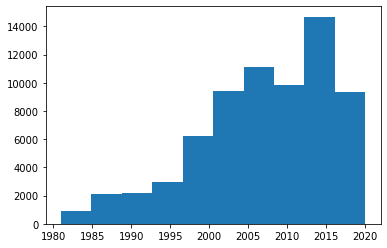

In [9]:
# Here the year at which advisers were first registered looks fairly monotonic 
# - there are some flat parts but it tends to increase. 2017-2020 does look fairly low, though.
# Not why this throws an error, but works.
first_advice = plt.hist(FA2020Apr['First Provided Advice'], bins = 10, 
                        range=(1981, 2020))



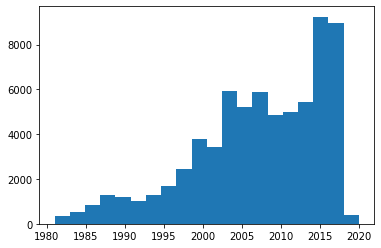

In [10]:
# by making a bin 2 years in size rather than 4 we see there is a substantial falloff as we move towards 2019-2020.
# The number of new advisers registered in 2019 and 2020 compared to those registered in the past years.
first_advice = plt.hist(FA2020Apr['First Provided Advice'], bins = 20, range=(1981, 2020.0))


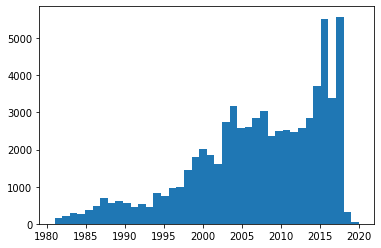

In [11]:
# Each year now has its own bin. 2019 and 2020 are virtually nonexistant, whereas 2018 seems to have seen a rush.
# Correlation is of course not causation, but it's not unreasonable to see this massive falloff as a result of the FASEA reforms
# coming into play on 1 January 2019. Looking at the below we can see 2019 had the least advisers registered for the first time

first_advice = plt.hist(FA2020Apr['First Provided Advice'], bins = 40, range=(1981, 2020.0))

In [12]:
# Of course, the above is for every adviser record - both ceased and current. To draw a more reasonable picture of the scenario
# we'd be better off looking at current records only

notnull = FA2020Apr[FA2020Apr["First Provided Advice"].notnull()]
current_adviser_firsts = notnull.loc[notnull["Current/Ceased"] == 'Current', "First Provided Advice"]



In [13]:
current_adviser_firsts

4        1970.0
9        1993.0
10       1997.0
17       2000.0
20       1997.0
          ...  
69845    2020.0
69867    2002.0
69873    2020.0
69875    2002.0
69884    2017.0
Name: First Provided Advice, Length: 23482, dtype: float64

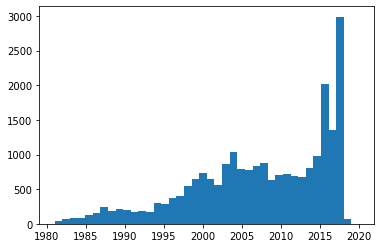

In [14]:
first_advice = plt.hist(current_adviser_firsts, bins = 40, range=(1981, 2020))

In [15]:
current_adviser_firsts.value_counts()

2018.0    2990
2016.0    2019
2017.0    1352
2004.0    1033
2015.0     973
2008.0     873
2003.0     866
2007.0     840
2014.0     801
2005.0     791
2006.0     773
2000.0     729
2011.0     724
2010.0     701
2012.0     684
2013.0     669
1999.0     645
2001.0     643
2009.0     632
2002.0     567
1998.0     546
1997.0     396
1996.0     368
1994.0     302
1995.0     281
1987.0     239
1989.0     208
1990.0     204
1992.0     190
1988.0     185
1993.0     176
1991.0     164
1986.0     155
1985.0     132
1984.0      89
1983.0      84
1982.0      66
2019.0      65
1980.0      51
1981.0      47
1979.0      32
1972.0      22
1977.0      20
1976.0      20
1978.0      19
1970.0      19
1974.0      17
1975.0      16
1971.0      13
1969.0      11
1973.0      10
1968.0       8
1965.0       6
1967.0       5
2020.0       4
1964.0       2
1963.0       2
1959.0       1
1955.0       1
1966.0       1
Name: First Provided Advice, dtype: int64

Some expected reslts here. While 2019-2020 remain very low, by restricting our results to only current advisers we see a comparatively smaller set of advisers who had started in the 80s and 90s, this only serves to highlight the tremendous falloff in 2019. It only takes into account advisers who are still current, though - the lower adviser numbers in 1980 are in part artefacts of restricting the set to current advisers -  an adviser who joined the industry at 25 in 1980 would be 65 today - a tremendous cohort of those advisers will have retired. 

Still, much of this is likely incompleteness in the data set - it seems unlikely there was only 1 practicing adviser in 1966. The earlier we try and draw conclusions from this data the less reliable it is likely to be.

In [16]:
current_adviser_afsl = notnull.loc[notnull["Current/Ceased"] == 'Current', "Licensee"]
current_adviser_afsl
current_counts = current_adviser_afsl.value_counts()
AFSL_numbers = current_counts.count()
print(AFSL_numbers)
current_counts

2203


AMP FINANCIAL PLANNING PTY LIMITED          1097
SMSF ADVISERS NETWORK PTY LTD                878
CHARTER FINANCIAL PLANNING LIMITED           552
SYNCHRONISED BUSINESS SERVICES PTY LTD       533
MORGANS FINANCIAL LIMITED                    504
                                            ... 
ANDREW MCLACHLAN                               1
MCEWEN INVESTMENT SERVICES PTY LIMITED         1
WOMEN'S FINANCIAL NETWORK PTY. LTD.            1
BASTION SUPERANNUATION SOLUTIONS PTY LTD       1
SUPERFECT PTY LTD                              1
Name: Licensee, Length: 2203, dtype: int64

The above yields some interesting results. The big players are as expected - AMP, Charter, Synchron. Other major points of interest are the SMSF Advisers Network (for accountants giving AFSL advice). Notably we have 23,482 registered advisera and 2203 registered AFSLs - approximately 10 advisers per AFSL on average.

In [17]:
norm_counts = current_adviser_afsl.value_counts(normalize=True)
norm_counts

AMP FINANCIAL PLANNING PTY LIMITED          0.046717
SMSF ADVISERS NETWORK PTY LTD               0.037390
CHARTER FINANCIAL PLANNING LIMITED          0.023507
SYNCHRONISED BUSINESS SERVICES PTY LTD      0.022698
MORGANS FINANCIAL LIMITED                   0.021463
                                              ...   
ANDREW MCLACHLAN                            0.000043
MCEWEN INVESTMENT SERVICES PTY LIMITED      0.000043
WOMEN'S FINANCIAL NETWORK PTY. LTD.         0.000043
BASTION SUPERANNUATION SOLUTIONS PTY LTD    0.000043
SUPERFECT PTY LTD                           0.000043
Name: Licensee, Length: 2203, dtype: float64

This also opens up some interesting points. AMP is the largest player (AMP also owns Charter, bringing it to a total of nearly 7% of the Australian FP market by numbers).

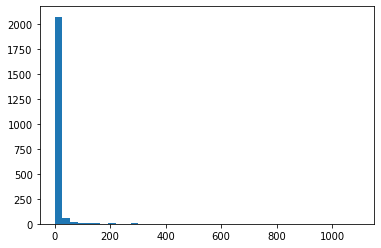

In [18]:
industry_spread = plt.hist(current_counts, bins = 40)

This histogram serves really only to highlight the disparity in advisers. Once we move past one or two advisers, the number of AFSLs is fairly low.

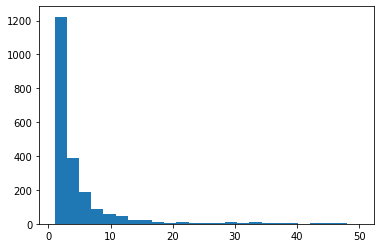

In [19]:
industry_spread = plt.hist(current_counts, bins = 25, range = (1, 50))

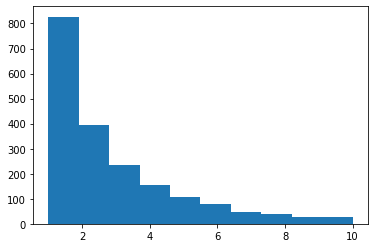

In [20]:
industry_spread = plt.hist(current_counts, bins = 10, range = (1, 10))

A little more context. We can see more of a pattern among the lower-number AFSLs.

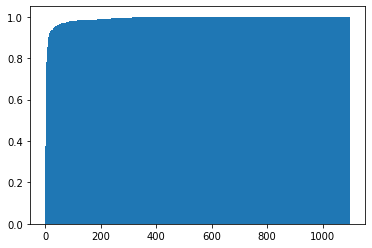

In [21]:
industry_spread = plt.hist(current_counts, bins = 1097, density =True, cumulative=True)

Here we see a density plot - we get *very* close to 100% of all AFSLs under 200 advisers. Let's try and look at it in a little more detail.

In [22]:
print(str(round(norm_counts[-1102:].sum()*100, 1)) + "% of advisers are held by the bottom 50% of firms")

print(str(round(norm_counts[-1652:-1102:].sum()*100, 1)) + "% of advisers are held by the next 25% of firms")

print(str(round(norm_counts[-1982:-1652].sum()*100, 1)) + "% of advisers are held by the next 15% of firms")

print("Overall, " + str(round(norm_counts[-1982:].sum()*100, 1)) + "% of advisers are held by the bottom 90% of firms")

print(str(round(norm_counts[-2092:-1982:].sum()*100, 1)) + "% of advisers are held by the 90-95% percentile of firms")

print(str(round(norm_counts[-2203:-2092:].sum()*100, 1)) + "% of advisers are held by the top 5% firms")

print("Separating out the top 5% of firms some more:")

print(str(round(norm_counts[-2153:-2093:].sum()*100, 1)) + "% of advisers are held by firms ranking 50-110 in size.")

print(str(round(norm_counts[-2163:-2153:].sum()*100, 1)) + "% of advisers are held by firms ranking 41-50 in size.")

print(str(round(norm_counts[-2173:-2163:].sum()*100, 1)) + "% of advisers are held by firms ranking 31-40 in size.")

print(str(round(norm_counts[-2183:-2173:].sum()*100, 1)) + "% of advisers are held by firms ranking 21-30 in size.")

print(str(round(norm_counts[-2193:-2183:].sum()*100, 1)) + "% of advisers are held by firms ranking 11-20 in size.")

print(str(round(norm_counts[-2203:-2193:].sum()*100, 1)) + "% of advisers are held by firms ranking 1-10 in size.")

5.9% of advisers are held by the bottom 50% of firms
7.5% of advisers are held by the next 25% of firms
10.5% of advisers are held by the next 15% of firms
Overall, 23.9% of advisers are held by the bottom 90% of firms
9.4% of advisers are held by the 90-95% percentile of firms
66.7% of advisers are held by the top 5% firms
Separating out the top 5% of firms some more:
14.3% of advisers are held by firms ranking 50-110 in size.
4.4% of advisers are held by firms ranking 41-50 in size.
6.3% of advisers are held by firms ranking 31-40 in size.
8.6% of advisers are held by firms ranking 21-30 in size.
11.1% of advisers are held by firms ranking 11-20 in size.
22.0% of advisers are held by firms ranking 1-10 in size.


The above is interesting - the top 10 firms hold roughly as many advisers as the bottom 90% of *all* firms. But how big are those firms? 

In [23]:
current_counts.quantile(q=[0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.925, 0.95, 0.975, 0.99])

0.300      1.00
0.400      2.00
0.500      2.00
0.600      3.00
0.700      4.00
0.800      6.00
0.900     12.00
0.925     17.00
0.950     34.90
0.975     82.00
0.990    204.98
Name: Licensee, dtype: float64

So looking at these quantiles, the bottom 30% of firms are all single adviser (likely self-licensed) AFSLs. The next 20% are all 2 members, and it's only after we reach the top 40% of firms we see firms with more than two advisers. The increase is massively exponential - the market is perhaps a little analogous to super funds - a lot of smaller players and a few very large ones.

In [24]:
# Making start and end date columns into datetimes.
FA2020Apr['Start Date'] =  pd.to_datetime(FA2020Apr['Start Date'], format = '%d/%m/%y')
FA2020Apr['End Date'] =  pd.to_datetime(FA2020Apr['End Date'], format = '%d/%m/%y')

In [25]:
# Confirming the above worked
FA2020Apr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69885 entries, 0 to 69884
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Name                   69885 non-null  object        
 1   Adviser Number         69885 non-null  int64         
 2   Current/Ceased         69885 non-null  object        
 3   First Provided Advice  69878 non-null  float64       
 4   Licensee               69885 non-null  object        
 5   AFS License Number     69885 non-null  int64         
 6   AFSL ABN               65822 non-null  object        
 7   Licensee Controller    48664 non-null  object        
 8   Start Date             69885 non-null  datetime64[ns]
 9   End Date               46396 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 5.3+ MB


In [26]:
# Exploring the new financial advisers in March

new_FA2020March = FA2020Apr[FA2020Apr['Start Date'] >= np.datetime64('2020-03-01')]

NFA320 = new_FA2020March['Licensee'].value_counts()

NFA320

INTERPRAC FINANCIAL PLANNING PTY LTD        41
INSIGHT INVESTMENT SERVICES PTY LTD         40
FORTNUM PRIVATE WEALTH LTD                  20
WYNDHAM VACATION CLUBS SOUTH PACIFIC LTD    16
LIFESPAN FINANCIAL PLANNING PTY LTD         15
                                            ..
IFS PRIVATE WEALTH PTY LTD                   1
COMMONWEALTH FINANCIAL PLANNING LIMITED      1
FORBES AFSL PTY LTD                          1
SIRA GROUP PTY LTD                           1
IPRAXIS PTY LTD                              1
Name: Licensee, Length: 140, dtype: int64

In [27]:
# Those advisers leaving in March

leave_FA2020March = FA2020Apr[FA2020Apr['End Date'] >= np.datetime64('2020-03-01')]

LFA320 = leave_FA2020March['Licensee'].value_counts()

LFA320



WYNDHAM VACATION CLUBS SOUTH PACIFIC LTD           63
FINANCIAL WISDOM LIMITED                           58
YELLOW BRICK ROAD WEALTH MANAGEMENT PTY LIMITED    44
AUSURE PTY LTD                                     35
AMP FINANCIAL PLANNING PTY LIMITED                 31
                                                   ..
AUSTRALIAN FINANCIAL PLANNING GROUP PTY LIMITED     1
BONES ACCOUNTING PTY LTD                            1
ORD MINNETT LIMITED                                 1
ROSKOW INDEPENDENT ADVISORY PTY LTD                 1
ZENITH REPRESENTATIVES PTY LTD                      1
Name: Licensee, Length: 204, dtype: int64

In [28]:
deltaFA320 = LFA320 - NFA320

for i in deltaFA320.index: # Need an empty series with all the AFSL names.
    deltaFA320[i] = 0 

for i in NFA320.index: # If we sum series, get lots of NaN. Need to sum piecewise.
    deltaFA320[i] += NFA320[i]
    
for i in LFA320.index: 
    deltaFA320[i] -= LFA320[i] # As above but for subtracting adviser losses.
    
deltaFA320.sort_values()



FINANCIAL WISDOM LIMITED                          -58.0
WYNDHAM VACATION CLUBS SOUTH PACIFIC LTD          -47.0
YELLOW BRICK ROAD WEALTH MANAGEMENT PTY LIMITED   -43.0
AUSURE PTY LTD                                    -35.0
COUNT FINANCIAL LIMITED                           -22.0
                                                   ... 
MILLENNIUM 3 FINANCIAL SERVICES PTY LTD            10.0
LIFESPAN FINANCIAL PLANNING PTY LTD                11.0
FORTNUM PRIVATE WEALTH LTD                         15.0
INTERPRAC FINANCIAL PLANNING PTY LTD               38.0
INSIGHT INVESTMENT SERVICES PTY LTD                39.0
Name: Licensee, Length: 277, dtype: float64

In [29]:
# Let's analyse on a yearly basis.
start_FA2019 = FA2020Apr[(FA2020Apr['Start Date'] <= np.datetime64('2019-12-31')) 
                         & (FA2020Apr['Start Date'] >= np.datetime64('2019-01-01'))]
leave_FA2019 = FA2020Apr[(FA2020Apr['End Date'] <= np.datetime64('2019-12-31')) 
                         & (FA2020Apr['End Date'] >= np.datetime64('2019-01-01'))]

In [30]:
NFA2019 = start_FA2019['Licensee'].value_counts()
LFA2019 = leave_FA2019['Licensee'].value_counts()

In [31]:
# Checking to see if this works.
NFA2019

WYNDHAM VACATION CLUBS SOUTH PACIFIC LTD            270
STATE SUPER FINANCIAL SERVICES AUSTRALIA LIMITED    262
VIRIDIAN ADVISORY PTY LTD                           127
SYNCHRONISED BUSINESS SERVICES PTY LTD              123
FORTNUM PRIVATE WEALTH LTD                          110
                                                   ... 
DOMINIUM CAPITAL PTY. LTD.                            1
TRUWEALTH GROUP PTY LTD                               1
LIPMAN BURGON AND PARTNERS PTY LIMITED                1
PROFESSIONAL WEALTH SERVICES PTY LTD                  1
LINK FINANCIAL SERVICES PTY LTD                       1
Name: Licensee, Length: 610, dtype: int64

In [32]:
LFA2019

COMMONWEALTH FINANCIAL PLANNING LIMITED             405
WYNDHAM VACATION CLUBS SOUTH PACIFIC LTD            361
WESTPAC BANKING CORPORATION                         350
AMP FINANCIAL PLANNING PTY LIMITED                  307
STATE SUPER FINANCIAL SERVICES AUSTRALIA LIMITED    300
                                                   ... 
NEWELL PALMER SECURITIES PTY LTD                      1
INTEGRATED FINANCIAL ADVICE PTY LTD                   1
SHANNON BELL                                          1
ANNE ELIZABETH PETERSEN                               1
CEZANNE INVESTMENT PRODUCT MANAGEMENT PTY LTD         1
Name: Licensee, Length: 893, dtype: int64

In [33]:
deltaFA2019 = (start_FA2019['Licensee'].value_counts() 
               - leave_FA2019['Licensee'].value_counts())

In [34]:
# An example to show why we can't just add and subtract series - this gives us NaN
# for anything not in the intersection of start_FA2019 and leave_FA2019. 
deltaFA2019

100 DOORS PTY. LTD.                        NaN
314 FINANCIAL PARTNERSHIP PTY LTD          NaN
360PRIVATE WEALTH BY DESIGN PTY LIMITED    NaN
3CSG PTY LTD                               NaN
3D SUPER PTY LTD                           NaN
                                          ... 
YX BALL FINANCIAL PTY LTD                  NaN
ZEBRA FINANCIAL SERVICES PTY LTD           NaN
ZENITH PLANNING PTY LTD                    NaN
ZENITH REPRESENTATIVES PTY LTD             NaN
ZEST AFSL PTY LTD                          5.0
Name: Licensee, Length: 1092, dtype: float64

In [35]:
deltaFA2019 = LFA2019 - NFA2019 # Gives us a union of the two in terms of index values.

for i in deltaFA2019.index:
    deltaFA2019[i] = 0 # Just getting an empty series with all the companies with any sort of change in March

for i in NFA2019.index: 
    deltaFA2019[i] += NFA2019[i] # Time to add all the new financial advisers. Just summing series means that any non-shared
                                # values will generate a new NaN each time, so need to do it bit by bit.
for i in LFA2019.index: 
    deltaFA2019[i] -= LFA2019[i] # Same but for loss of financial advisers.
    
DFA2019sort = deltaFA2019.sort_values()

In [36]:
# Checking to see if these two are exactly the same.
DFA2019sort.equals(DFA2019sort.dropna())

True

In [37]:
DFA2019sort[0:10]

COMMONWEALTH FINANCIAL PLANNING LIMITED   -385.0
WESTPAC BANKING CORPORATION               -349.0
SECURITOR FINANCIAL GROUP LTD             -245.0
AMP FINANCIAL PLANNING PTY LIMITED        -240.0
FINANCIAL WISDOM LIMITED                  -205.0
AON HEWITT FINANCIAL ADVICE LIMITED       -185.0
NATIONAL AUSTRALIA BANK LIMITED           -177.0
SMSF ADVISERS NETWORK PTY LTD             -170.0
COUNT FINANCIAL LIMITED                   -133.0
GWM ADVISER SERVICES LIMITED              -133.0
Name: Licensee, dtype: float64

Starting to get the meat of things. We can see in 2019 the biggest drops in advisers were from Commonwealth Financial Planning and Westpac - these notably had major scandals followed by partial or total exits from the financial planning business in that year.

In [38]:
print("Viridian " + str(current_counts["VIRIDIAN ADVISORY PTY LTD"]))
print("Fortnum " + str(current_counts["FORTNUM PRIVATE WEALTH LTD"]))
DFA2019sort[-10:]

Viridian 121
Fortnum 214


ADVICE EVOLUTION PTY LTD                        32.0
CAPSTONE FINANCIAL PLANNING PTY LTD             33.0
SHAW AND PARTNERS FINANCIAL PLANNING PTY LTD    35.0
AFFINIA FINANCIAL ADVISERS LIMITED              37.0
OREANA FINANCIAL SERVICES PTY LTD               37.0
ALLIANCE WEALTH PTY LTD                         40.0
CONSILIUM ADVICE PTY LTD                        71.0
MACQUARIE BANK LIMITED                          79.0
VIRIDIAN ADVISORY PTY LTD                       79.0
FORTNUM PRIVATE WEALTH LTD                      82.0
Name: Licensee, dtype: float64

Conversely, we can see Fortnum went up in numbers considerably. However, it's notable that in 2019 our larger losses totally eclipsed gains.

In [39]:
DFA2019sort.describe()

count    1092.000000
mean       -4.139194
std        25.802977
min      -385.000000
25%        -2.000000
50%        -1.000000
75%         1.000000
max        82.000000
Name: Licensee, dtype: float64

An overall look at 2019. The average licensee lost 4 advisers, though the variation in losses and gains was fairly wide. Interestingly the *median* AFSL lost an adviser, and only at the 75% mark do we see a gain. 

In [40]:
# Time to do this with functions. One function to return the number of advisers per AFSL on a given date.

def advisers_on_date(adviserdate):
    i = FA2020Apr[(FA2020Apr['Start Date'] <= np.datetime64(adviserdate)) 
                  & ((FA2020Apr['End Date'] >= np.datetime64(adviserdate)) | (FA2020Apr['Current/Ceased'] == 'Current'))]
    return i

In [41]:
# This returns a dataframe with a number of series as per advisers_on_date. It returns 

def many_dates(adviserdate, between, repetitions):
    manydates = {}
    adviserdate = np.datetime64(adviserdate)
    between = pd.Timedelta(days = between)
    # If between is added to adviserdate at end of loop, it throws a peculiar error.
    # De-incremented adviserdate by between to compensate and increment at start of loop.
    adviserdate = adviserdate - between 
    for x in range(0,repetitions):
        adviserdate = adviserdate + between
        if x == 0:
            newseries = advisers_on_date(adviserdate)
            newseries = newseries['Licensee'].value_counts()
            manydates[adviserdate] = newseries
        else: 
            newseries = advisers_on_date(adviserdate)
            newseries = newseries['Licensee'].value_counts()
            manydates[adviserdate] = newseries
    manydates = pd.DataFrame(data=manydates)
    manydates.fillna(0, inplace = True) 
    return manydates



In [42]:
# Returns differences in adviser numbers between two dates.

def adviser_delta(date1, date2):
    start = FA2020Apr[(FA2020Apr['Start Date'] <= np.datetime64(date2)) & (FA2020Apr['Start Date'] >= np.datetime64(date1))]
    end = FA2020Apr[(FA2020Apr['End Date'] <= np.datetime64(date2)) & (FA2020Apr['End Date'] >= np.datetime64(date1))]
    NFA = start['Licensee'].value_counts()
    LFA = end['Licensee'].value_counts()
    DFA = LFA - NFA

    for i in DFA.index:
        DFA[i] = 0

    for i in NFA.index: 
        DFA[i] += NFA[i] 
        
    for i in LFA.index: 
        DFA[i] -= LFA[i]
        
    return DFA

In [43]:
# Essentially as many_dates - returns m

def many_deltas(adviserdate, between, repetitions):
    manydeltas = {}
    adviserdate = np.datetime64(adviserdate)
    between = pd.Timedelta(days = between)
    adviserdate = adviserdate - between 
    for x in range(0,repetitions):
        adviserdate = adviserdate + between
        adviserend = adviserdate + between
        if x == 0:
            newseries = adviser_delta(adviserdate, adviserend)
            manydeltas[adviserdate] = newseries
        else: 
            newseries = adviser_delta(adviserdate, adviserend)
            manydeltas[adviserdate] = newseries
        
    manydeltas = pd.DataFrame(data= manydeltas)
    manydeltas.fillna(0, inplace = True) 
    return manydeltas



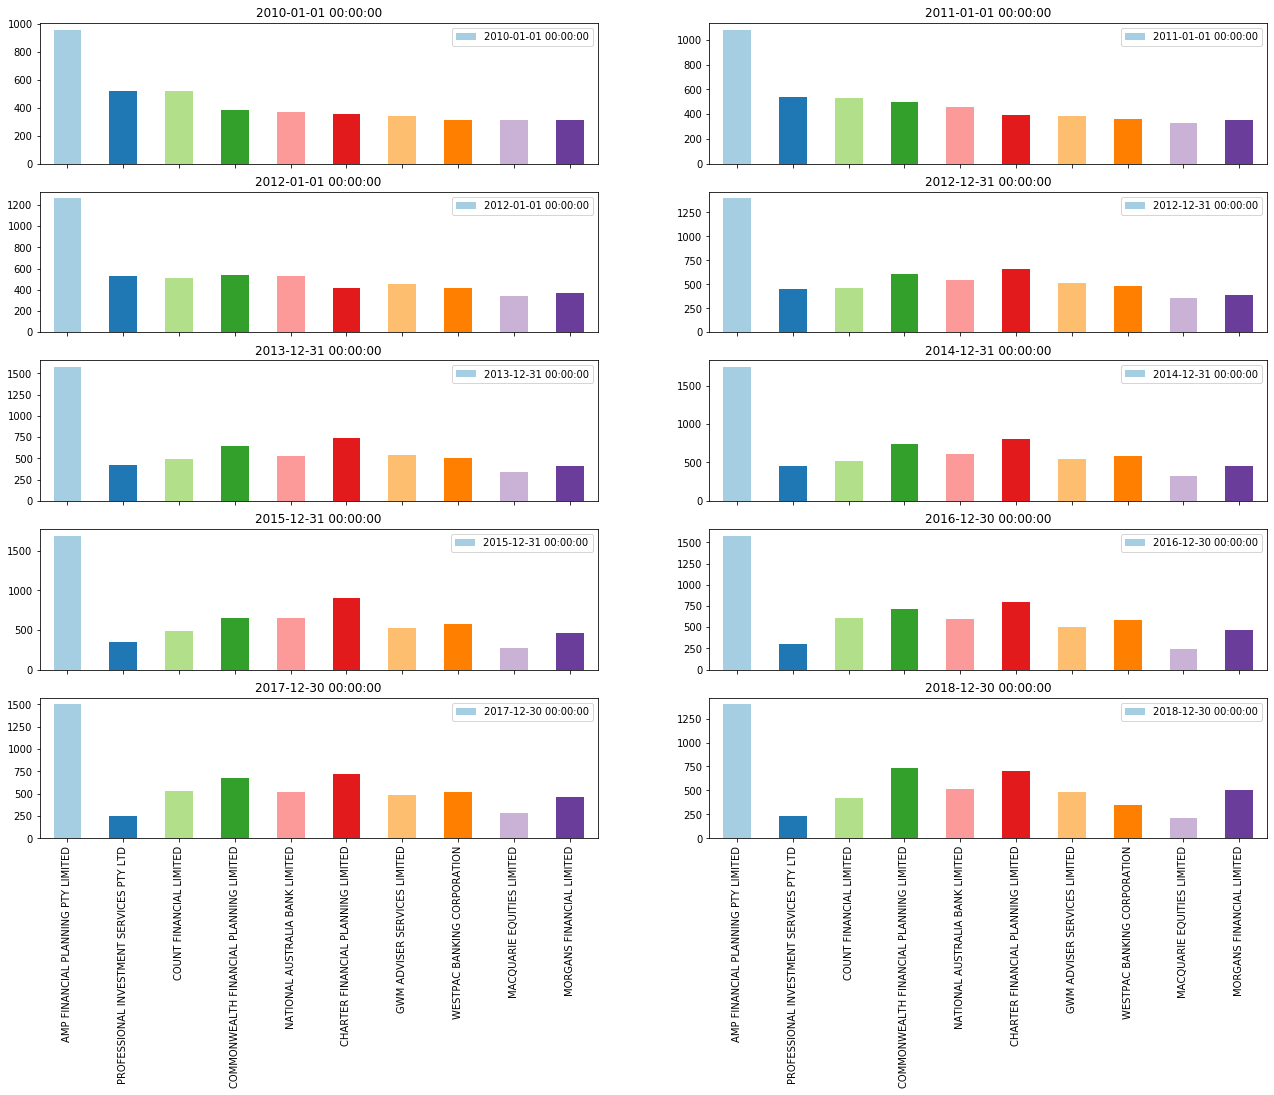

In [44]:
lastdecade = many_dates('2010-01-01', 365, 10)
lastdecade = lastdecade.sort_values(by=['2010-01-01'], ascending=False)

lastdecade[0:10].plot.bar(subplots=True, figsize=(22, 15), layout=(5, 2), color=[plt.cm.Paired(np.arange(len(lastdecade[0:10])))]);

lastdecadeT = lastdecade.T

In [45]:
# Function for returning top x values of each given column.
def topx(dataframe, x):
    topvalues = {}
    for i in dataframe:
        topvalues[i] = dataframe[i].sort_values(ascending=False)[0:x]
    return topvalues

topx(lastdecade, 5)

{Timestamp('2010-01-01 00:00:00'): AMP FINANCIAL PLANNING PTY LIMITED          958.0
 PROFESSIONAL INVESTMENT SERVICES PTY LTD    520.0
 COUNT FINANCIAL LIMITED                     520.0
 COMMONWEALTH FINANCIAL PLANNING LIMITED     384.0
 NATIONAL AUSTRALIA BANK LIMITED             367.0
 Name: 2010-01-01 00:00:00, dtype: float64,
 Timestamp('2011-01-01 00:00:00'): AMP FINANCIAL PLANNING PTY LIMITED          1084.0
 PROFESSIONAL INVESTMENT SERVICES PTY LTD     540.0
 COUNT FINANCIAL LIMITED                      528.0
 COMMONWEALTH FINANCIAL PLANNING LIMITED      495.0
 NATIONAL AUSTRALIA BANK LIMITED              456.0
 Name: 2011-01-01 00:00:00, dtype: float64,
 Timestamp('2012-01-01 00:00:00'): AMP FINANCIAL PLANNING PTY LIMITED          1262.0
 COMMONWEALTH FINANCIAL PLANNING LIMITED      535.0
 PROFESSIONAL INVESTMENT SERVICES PTY LTD     528.0
 NATIONAL AUSTRALIA BANK LIMITED              526.0
 COUNT FINANCIAL LIMITED                      508.0
 Name: 2012-01-01 00:00:00, dtype: 